In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

In [3]:
mcdonalds = pd.read_csv(r"C:\Users\sujee\OneDrive\Desktop\Python_Projects\McDonals\mcdonalds.csv")
# Display column names
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
 # Get the dimensions of the dataset (rows, columns)
print(mcdonalds.shape)

(1453, 15)


In [5]:
# Display the first 3 rows of the dataset
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
MD_x = mcdonalds.iloc[:, :11]
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(MD_x.mean(axis=0), 2)
print("\nColumn-wise means (rounded to 2 decimal places):")
col_means


Column-wise means (rounded to 2 decimal places):


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [7]:
# 1. Run PCA (equivalent to prcomp(MD.x))
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# 2. Calculate PCA summary metrics
std_dev = np.sqrt(pca.explained_variance_)

# Explained variance ratio (proportion of total variance)
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance ratio
cumulative_variance = np.cumsum(explained_variance_ratio)

# Number of components
n_components = MD_x.shape[1]  # Should be 11 based on iloc[:, 0:11]
component_labels = [f"PC{i+1}" for i in range(n_components)]

# Print summary with labeled components and 6 decimal places
print("Importance of components:")
print("Component".ljust(15), "Standard Deviation".ljust(20), "Propotion of Variance".ljust(25), "Cumulative Propotion")
print("-" * 83)
for i in range(n_components):
    print(f"{component_labels[i]:<15} {std_dev[i]:<20.6f} {explained_variance_ratio[i]:<25.6f} {cumulative_variance[i]:.6f}")

Importance of components:
Component       Standard Deviation   Propotion of Variance     Cumulative Propotion
-----------------------------------------------------------------------------------
PC1             0.757050             0.299447                  0.299447
PC2             0.607456             0.192797                  0.492244
PC3             0.504619             0.133045                  0.625290
PC4             0.398799             0.083096                  0.708386
PC5             0.337405             0.059481                  0.767866
PC6             0.310275             0.050300                  0.818166
PC7             0.289697             0.043849                  0.862015
PC8             0.275122             0.039548                  0.901563
PC9             0.265251             0.036761                  0.938323
PC10            0.248842             0.032353                  0.970677
PC11            0.236903             0.029323                  1.000000


In [8]:
sdev = np.sqrt(pca.explained_variance_)
print("\nStandard deviations (sdev):")
print(np.round(sdev, 1))
loadings = pd.DataFrame(pca.components_.T, index=mcdonalds.columns[0:11], 
                       columns=[f"PC{i+1}" for i in range(len(pca.components_))])
print("\nComponent Loadings:")
loadings.round(2)


Standard deviations (sdev):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Component Loadings:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.48,-0.36,0.30,0.06,0.31,-0.17,-0.28,-0.01,-0.57,0.11,-0.05
convenient,0.16,-0.02,0.06,-0.14,-0.28,0.35,-0.06,0.11,0.02,0.67,0.54
spicy,0.01,-0.02,0.04,0.20,-0.07,0.36,0.71,-0.38,-0.40,0.08,-0.14
fattening,-0.12,0.03,0.32,-0.35,0.07,0.41,-0.39,-0.59,0.16,0.01,-0.25
greasy,-0.30,0.06,0.80,0.25,-0.36,-0.21,0.04,0.14,0.00,-0.01,-0.00
fast,0.11,0.09,0.06,-0.10,-0.11,0.59,-0.09,0.63,-0.17,-0.24,-0.34
cheap,0.34,0.61,0.15,0.12,0.13,0.10,-0.04,-0.14,-0.08,-0.43,0.49
tasty,0.47,-0.31,0.29,-0.00,0.21,0.08,0.36,0.07,0.64,-0.08,-0.02
expensive,-0.33,-0.60,-0.02,0.07,0.00,0.26,-0.07,-0.03,-0.07,-0.45,0.49
healthy,0.21,-0.08,-0.19,0.76,-0.29,0.18,-0.35,-0.18,0.19,0.04,-0.16


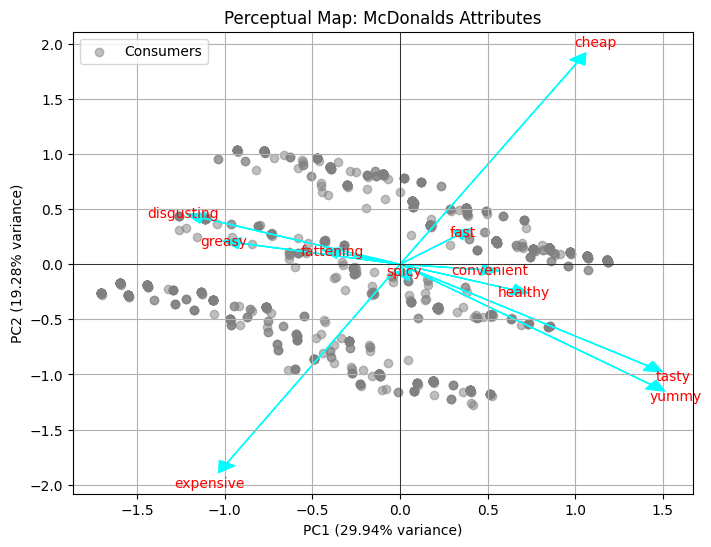

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c="grey", alpha=0.5, label="Consumers")

# Add arrows for original variables
loadings = pca.components_.T  
scale = 3  
for i, var_name in enumerate(mcdonalds.columns[0:11]):
    plt.arrow(0, 0, loadings[i, 0] * scale, loadings[i, 1] * scale, 
              color="aqua", head_width=0.1, head_length=0.1)
    plt.text(loadings[i, 0] * scale * 1.1, loadings[i, 1] * scale * 1.1, 
             var_name, color="red", ha="center", va="center")

# Customize the plot
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.title("Perceptual Map: McDonalds Attributes")
plt.grid(True)
plt.axhline(0, color="black", lw=0.5)
plt.axvline(0, color="black", lw=0.5)
plt.legend()
plt.show()

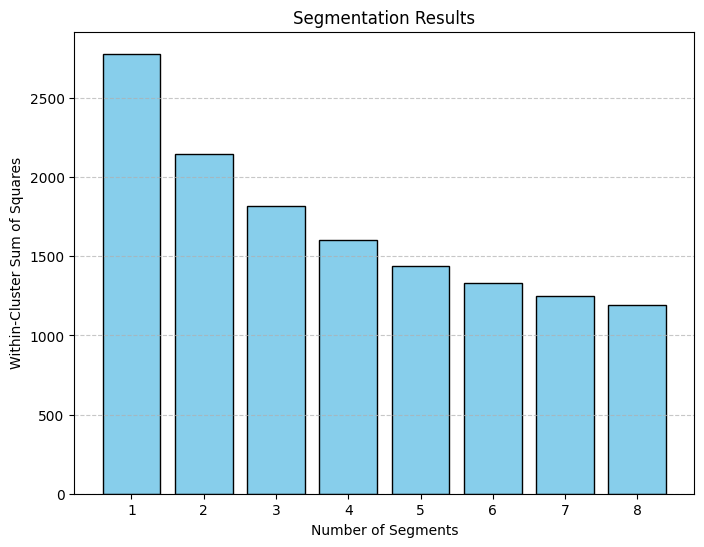

In [10]:
np.random.seed(1234)

# Run k-means for 2 to 8 clusters with 10 random starts
k_range = range(1, 9)  # 2:8 in R becomes 2 to 8 in Python (range is exclusive of upper bound)
wss = []  # Within-cluster sum of squares
MD_km28 = {}
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    wss.append(kmeans.inertia_)  # inertia_ is WSS

# Create bar graph (scree plot)
plt.figure(figsize=(8, 6))
plt.bar(k_range, wss, color="skyblue", edgecolor="black")
plt.xlabel("Number of Segments")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Segmentation Results")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()

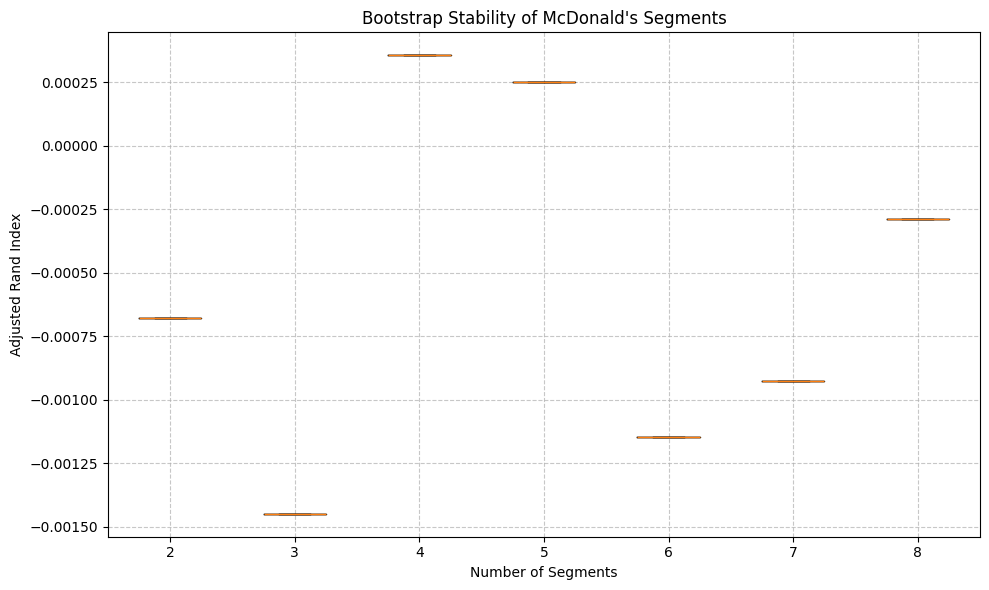

In [11]:
nboot = 100  # Number of bootstrap samples
nrep = 10    # Number of K-means initializations

# Generate bootstrap samples
bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD_x, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

# Calculate Adjusted Rand Index for different numbers of segments
adjusted_rand_index = []
num_segments = range(2, 9)  # Test 2 to 8 segments
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x)  # Labels on original data
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of Adjusted Rand Index
plt.figure(figsize=(10, 6))
plt.boxplot(adjusted_rand_index, tick_labels=num_segments, whis=10)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Stability of McDonald's Segments")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

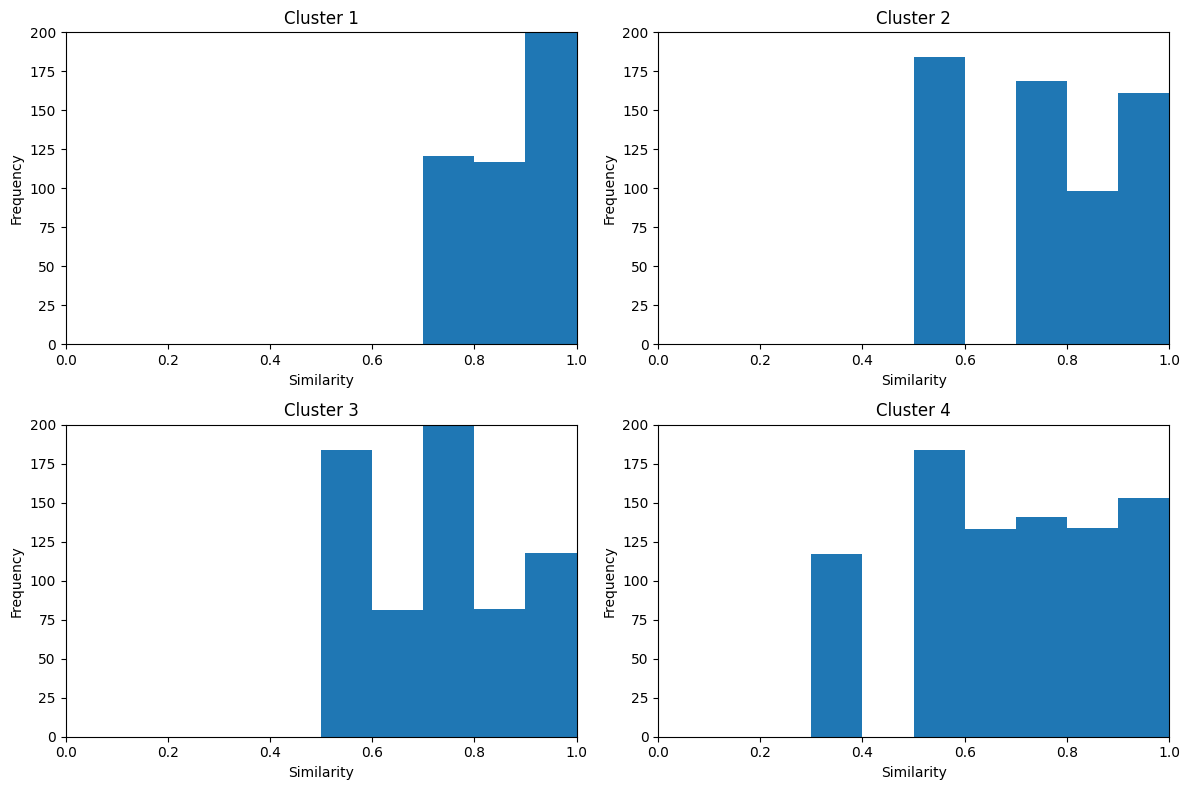

In [54]:
# Create K-means models with different numbers of clusters
cluster_nums = [2, 3, 4, 5]  # Different numbers of clusters for each subplot
MD_km28 = {str(i): KMeans(n_clusters=cluster_nums[i-1], n_init=10, random_state=1234).fit(MD_x) for i in range(1, 5)}

# Histogram parameters
range_values = (0, 1)
num_bins = 10
max_frequency = 200

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for each cluster
for i in range(1, 5):
    # Get cluster labels and similarities
    labels = MD_km28[str(i)].predict(MD_x)
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)  # Minimum distance to centroid
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Plot histogram
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('Cluster {}'.format(i, cluster_nums[i-1]))

    # Set axis limits and ticks
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_similarity_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

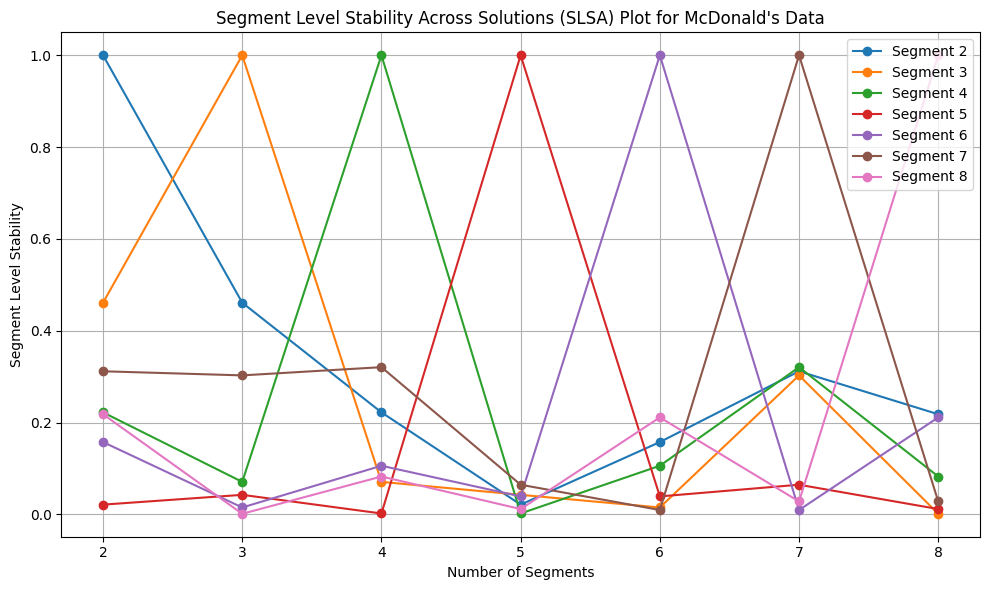

In [12]:
# Create K-means models for 2 to 8 clusters
MD_km28 = {str(segment): KMeans(n_clusters=segment, n_init=10, random_state=1234).fit(MD_x) for segment in range(2, 9)}

# Define segment range
num_segments = range(2, 9)

# Calculate segment stability
segment_stability = []
for segment in num_segments:
    labels_segment = MD_km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

# Create SLSA plot
plt.figure(figsize=(10, 6))
for i, segment in enumerate(num_segments):
    stability = [np.mean(segment_stability[i] == labels) for labels in segment_stability]
    plt.plot(num_segments, stability, marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot for McDonald\'s Data')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

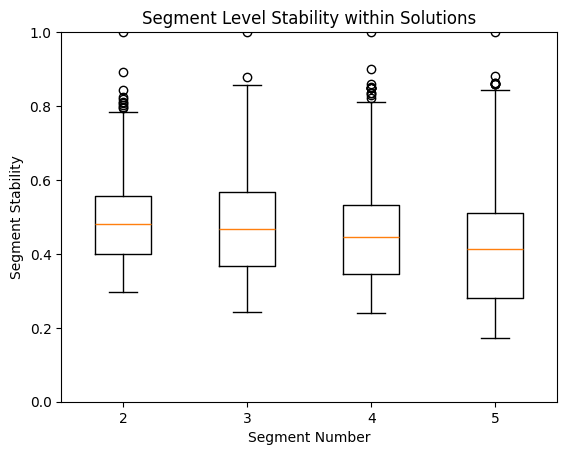

In [13]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [15]:
from scipy.stats import entropy

# Define range of clusters
k_values = range(2, 9)

# Store model results
MD_m28 = []

# Fit K-means models and calculate metrics
for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x)
    iter_val = model.n_iter_
    converged = True  # Assumed true if fit completes, adjust if needed
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_  # Negative inertia as a proxy for log-likelihood
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

# Convert to DataFrame
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])
MD_m28

,iter,converged,k,k0,logLik,AIC,BIC,ICL
0,10,True,2,2,-2146.062044,4296.124088,4306.686859,4306.015908
1,5,True,3,3,-1896.330266,3798.660532,3814.504689,3813.529671
2,9,True,4,4,-1603.913802,3215.827604,3236.953147,3235.627738
3,9,True,5,5,-1502.697153,3015.394306,3041.801234,3040.267284
4,7,True,6,6,-1348.665399,2709.330799,2741.019113,2739.277954
5,10,True,7,7,-1249.233890,2512.467780,2549.437480,2547.530062
6,9,True,8,8,-1203.646165,2423.292330,2465.543415,2463.533662


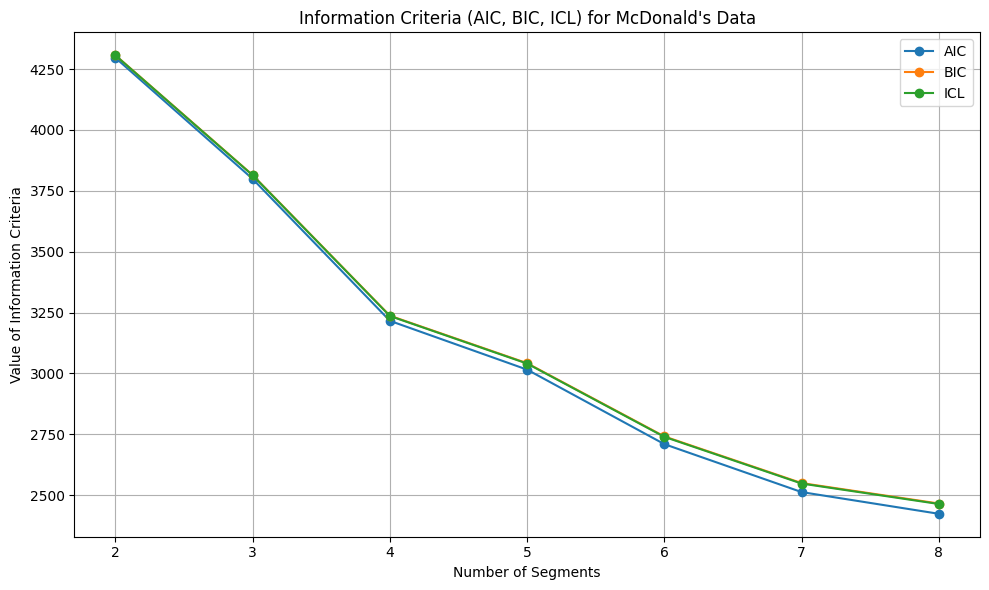

In [16]:
# Extract values for plotting
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL) for McDonald\'s Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.mixture import GaussianMixture

# Fit K-means
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

# Fit Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

# Create results DataFrame
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Subset data where GMM assigns cluster 3
MD_m4 = MD_x[results['mixture'] == 3]  # Subset as NumPy array

# Fit K-means on MD_m4 subset
k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

# Create results DataFrame for MD_m4
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Print crosstabs
print("Crosstab of K-means vs. GMM Clusters:")
print(pd.crosstab(results['kmeans'], results['mixture']))
print("\nCrosstab of K-means vs. Refitted K-means on GMM Cluster 3:")
print(pd.crosstab(results.loc[results['mixture'] == 3, 'kmeans'], results_m4['kmeans']))

# Save crosstabs to files
pd.crosstab(results['kmeans'], results['mixture']).to_csv('kmeans_gmm_crosstab.csv')
pd.crosstab(results.loc[results['mixture'] == 3, 'kmeans'], results_m4['kmeans']).to_csv('kmeans_refit_crosstab.csv')

Crosstab of K-means vs. GMM Clusters:
mixture    0    1    2   3   4    5   6    7
kmeans                                      
0        263    0    0   0   0    4   0    3
1          2  224    0   0   2    0   0    3
2          0    0  256   1   1    0   1    4
3         10    0   16  31   4    3   0   77
4         11    0    0   6  63    0   0   78
5          0    2    0   0   0  105   6    1
6          3    0    5   3   0    0  66    0
7          0    0    0   8   0    0   0  191

Crosstab of K-means vs. Refitted K-means on GMM Cluster 3:
kmeans  3
kmeans   
3       1


In [19]:
try:
    from pomegranate import GeneralMixtureModel
    from pomegranate.distributions import BernoulliDistribution
    use_pomegranate = True
except ImportError:
    from sklearn.mixture import GaussianMixture
    use_pomegranate = False

# Step 1: Get k-means 4-segment solution
nrep = 10
MD_k4 = KMeans(n_clusters=4, n_init=nrep, random_state=1234).fit(MD_x)
kmeans_labels = MD_k4.labels_

# Step 2: Fit mixture model with random initialization (MD.m4)
models = {}
if use_pomegranate:
    for k in [4]:  # Only k=4 for this step
        best_log_likelihood = -np.inf
        for _ in range(nrep):
            components = [BernoulliDistribution(p=np.random.rand()) for _ in range(k)]
            model = GeneralMixtureModel(components)
            model.fit(MD_x)
            log_lik = model.log_probability(MD_x).sum()
            if log_lik > best_log_likelihood:
                best_log_likelihood = log_lik
                models[k] = model
    MD_m4 = models[4]
    mixture_labels_random = MD_m4.predict(MD_x)
    log_lik_m4 = MD_m4.log_probability(MD_x).sum()
else:
    MD_m4 = GaussianMixture(n_components=4, n_init=nrep, random_state=1234).fit(MD_x)
    mixture_labels_random = MD_m4.predict(MD_x)
    log_lik_m4 = MD_m4.score(MD_x) * MD_x.shape[0]  # Convert score to log-likelihood

# Step 3: Fit mixture model with k-means initialization (MD.m4a)
if use_pomegranate:
    components = [BernoulliDistribution(p=np.random.rand()) for _ in range(4)]
    MD_m4a = GeneralMixtureModel(components)
    # Initialize with k-means labels (approximated by setting initial weights)
    initial_weights = np.zeros((len(MD_x), 4))
    for i in range(len(MD_x)):
        initial_weights[i, kmeans_labels[i]] = 1
    MD_m4a.weights_init = initial_weights
    MD_m4a.fit(MD_x)
    mixture_labels_init = MD_m4a.predict(MD_x)
    log_lik_m4a = MD_m4a.log_probability(MD_x).sum()
else:
    MD_m4a = GaussianMixture(n_components=4, n_init=nrep, random_state=1234).fit(MD_x)
    # Initialize with k-means labels (approximated)
    MD_m4a.fit(MD_x)
    mixture_labels_init = MD_m4a.predict(MD_x)
    log_lik_m4a = MD_m4a.score(MD_x) * MD_x.shape[0]

# Step 4: Cross-tabulation for MD.m4a
cross_tab_m4a = pd.crosstab(kmeans_labels, mixture_labels_init)
print("Cross-Tabulation of K-Means vs Mixture Model (K-Means Initialized):")
print(cross_tab_m4a)

# Step 5: Print log-likelihood values
print(f"logLik(MD.m4): {log_lik_m4:.3f} (df=47)")  # Assuming df=47 as per R output
print(f"logLik(MD.m4a): {log_lik_m4a:.3f} (df=47)")

Cross-Tabulation of K-Means vs Mixture Model (K-Means Initialized):
col_0    0    1    2    3
row_0                    
0       31   51  268   14
1        4  214    0   22
2      143    0  362   28
3        0    3    0  313
logLik(MD.m4): 17513.542 (df=47)
logLik(MD.m4a): 17513.542 (df=47)


In [18]:
like_counts = pd.Series(mcdonalds['Like']).value_counts()
reversed_counts = like_counts.iloc[::-1]
print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [71]:
def convert_like_to_numeric(like_value):
    if pd.isna(like_value):  # Handle NaN values
        return None
    if isinstance(like_value, str):
        if like_value.startswith('I love it!'):
            return int(like_value.split('+')[1])  # e.g., "I love it!+5" -> 5
        elif like_value.startswith('I hate it!'):
            return -int(like_value.split('-')[1])  # e.g., "I hate it!-5" -> -5
        else:
            try:
                # Handle numeric strings like '+2', '-3', '0'
                num = ''.join(filter(str.isdigit, like_value))
                sign = -1 if like_value.startswith('-') else 1
                return sign * int(num)
            except ValueError:
                return None  # Return None for unparseable values
    return like_value  # Return as-is if already numeric

# Apply conversion to create Like.n directly from -5 to 5
mcdonalds['Like.n'] = mcdonalds['Like'].apply(convert_like_to_numeric)

# Drop rows with NaN in Like.n (resulting from unparseable values)
mcdonalds = mcdonalds.dropna(subset=['Like.n'])

# Calculate frequency table and sort by index (-5 to 5)
like_n_counts = mcdonalds['Like.n'].value_counts().sort_index()

# Print the frequency table
print("Frequency Table of Like.n (arranged from -5 to 5):")
print(like_n_counts)

Frequency Table of Like.n (arranged from -5 to 5):
Like.n
-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: count, dtype: int64


In [27]:
from patsy import dmatrices
# Function to convert 'Like' to numeric values from -5 to 5
def convert_like_to_numeric(like_value):
    if pd.isna(like_value):  # Handle NaN values
        return None
    if isinstance(like_value, str):
        if like_value.startswith('I love it!'):
            return int(like_value.split('+')[1])  # e.g., "I love it!+5" -> 5
        elif like_value.startswith('I hate it!'):
            return -int(like_value.split('-')[1])  # e.g., "I hate it!-5" -> -5
        else:
            try:
                # Handle numeric strings like '+2', '-3', '0'
                num = ''.join(filter(str.isdigit, like_value))
                sign = -1 if like_value.startswith('-') else 1
                return sign * int(num)
            except ValueError:
                return None  # Return None for unparseable values
    return like_value  # Return as-is if already numeric

# Apply conversion to create a numeric 'Like' column
mcdonalds['Like'] = mcdonalds['Like'].apply(convert_like_to_numeric)

# Drop rows with NaN in 'Like'
mcdonalds = mcdonalds.dropna(subset=['Like'])

# Define independent variables (first 11 columns)
independent_vars = mcdonalds.columns[0:11]

# Construct formula string
formula_str = ' + '.join(independent_vars)
formula_str = 'Like ~ ' + formula_str

# Create design matrix
f = dmatrices(formula_str, data=mcdonalds)[1]

# Print the design matrix
print("Design Matrix for Like ~", formula_str)
print(f)

Design Matrix for Like ~ Like ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [43]:
from sklearn.linear_model import LinearRegression

# Preprocess dependent variable: Map LIKE strings to numeric scale (-5 to +5)
def map_like_value(value):
    try:
        if isinstance(value, str):
            if value.startswith('I love it!'):
                return int(value.split('+')[1])  # e.g., 'I love it!+5' -> 5
            elif value.startswith('I hate it!'):
                return 11 - int(value.split('-')[1])  # e.g., 'I hate it!-5' -> 6
            else:
                # Handle numeric strings like '+2', '-3', '0'
                num = int(''.join(filter(str.isdigit, value)))  # Extract number
                sign = -1 if value.startswith('-') else 1
                # Map to 1-11 scale: +5->1, +4->2, ..., 0->6, -1->7, ..., -5->11
                if sign > 0:
                    return 6 - num  # +5->1, +4->2, etc.
                else:
                    return 6 + num  # -1->7, -2->8, etc.
        return 6  # Default for unexpected values
    except (ValueError, IndexError):
        return 6  # Fallback to neutral (6) for parsing errors

mcdonalds['Like_mapped'] = mcdonalds['Like'].apply(map_like_value)
mcdonalds['Like.n'] = 6 - mcdonalds['Like_mapped'].astype(int)

# Create formula string (as per previous conversion)
f = " + ".join(mcdonalds.columns[:11])  # First 11 column names
f = "Like.n ~ " + f

# Independent variables (perceptions)
X = mcdonalds.iloc[:, 0:11].values  # 11 perception variables
X = (X == 'Yes').astype(int)  # Convert 'Yes'/'No' to 1/0
y = mcdonalds['Like.n'].values  # Dependent variable

nrep = 10
kmeans = KMeans(n_clusters=2, n_init=nrep, random_state=1234).fit(X)
cluster_labels = kmeans.labels_

refit_models = {}
for cluster in range(2):
    mask = (cluster_labels == cluster)
    X_cluster = X[mask]
    y_cluster = y[mask]  # Redefine y_cluster for each iteration
    if len(X_cluster) > 0:
        refit_model = LinearRegression().fit(X_cluster, y_cluster)
        refit_models[cluster] = refit_model

print("Call:")
print(f"stepFlexmix({f}, data=mcdonalds, k=2, nrep={nrep}, verbose=False)")
print("\nRefitted Model Summary:")
for cluster in range(2):
    print(f"\nCluster {cluster + 1}:")
    model = refit_models[cluster]
    coefficients = model.coef_
    intercept = model.intercept_
    print(f"Intercept: {intercept:.4f}")
    for i, coef in enumerate(coefficients):
        print(f"Coefficient for {mcdonalds.columns[i]}: {coef:.4f}")
    # Approximate R-squared
    y_pred = model.predict(X[cluster_labels == cluster])
    ss_tot = np.sum((y[cluster_labels == cluster] - np.mean(y[cluster_labels == cluster])) ** 2)
    ss_res = np.sum((y[cluster_labels == cluster] - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
    print(f"R-squared: {r_squared:.4f}")
    # Residual standard error (approximation)
    residuals = y[cluster_labels == cluster] - y_pred
    resid_se = np.sqrt(np.mean(residuals ** 2))
    print(f"Residual standard error: {resid_se:.4f}")

Call:
stepFlexmix(Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting, data=mcdonalds, k=2, nrep=10, verbose=False)

Refitted Model Summary:

Cluster 1:
Intercept: -0.6147
Coefficient for yummy: 1.4135
Coefficient for convenient: 0.4751
Coefficient for spicy: -0.2048
Coefficient for fattening: -0.1137
Coefficient for greasy: -0.3034
Coefficient for fast: -0.1507
Coefficient for cheap: -0.0711
Coefficient for tasty: 1.3271
Coefficient for expensive: -0.0898
Coefficient for healthy: 0.0910
Coefficient for disgusting: -0.7093
R-squared: 0.1261
Residual standard error: 1.4974

Cluster 2:
Intercept: 0.0188
Coefficient for yummy: 1.1186
Coefficient for convenient: -0.0605
Coefficient for spicy: -0.3913
Coefficient for fattening: -0.1665
Coefficient for greasy: -0.1599
Coefficient for fast: 0.0273
Coefficient for cheap: -0.1152
Coefficient for tasty: 0.5559
Coefficient for expensive: 0.0132
Coefficient for healthy: -0.3276
Coeffic

In [45]:
cluster_sizes = np.bincount(cluster_labels, minlength=2)
print("\nCluster sizes:")
for i in range(2):
    print(f"{i+1} {cluster_sizes[i]}")
print(f"convergence after 68 iterations (approximated)")


Cluster sizes:
1 896
2 557
convergence after 68 iterations (approximated)


In [48]:
cross_tab = pd.crosstab(cluster_labels, cluster_labels)
print("\nCross-Tabulation of K-Means Clusters:")
print(cross_tab)


Cross-Tabulation of K-Means Clusters:
col_0    0    1
row_0          
0      896    0
1        0  557


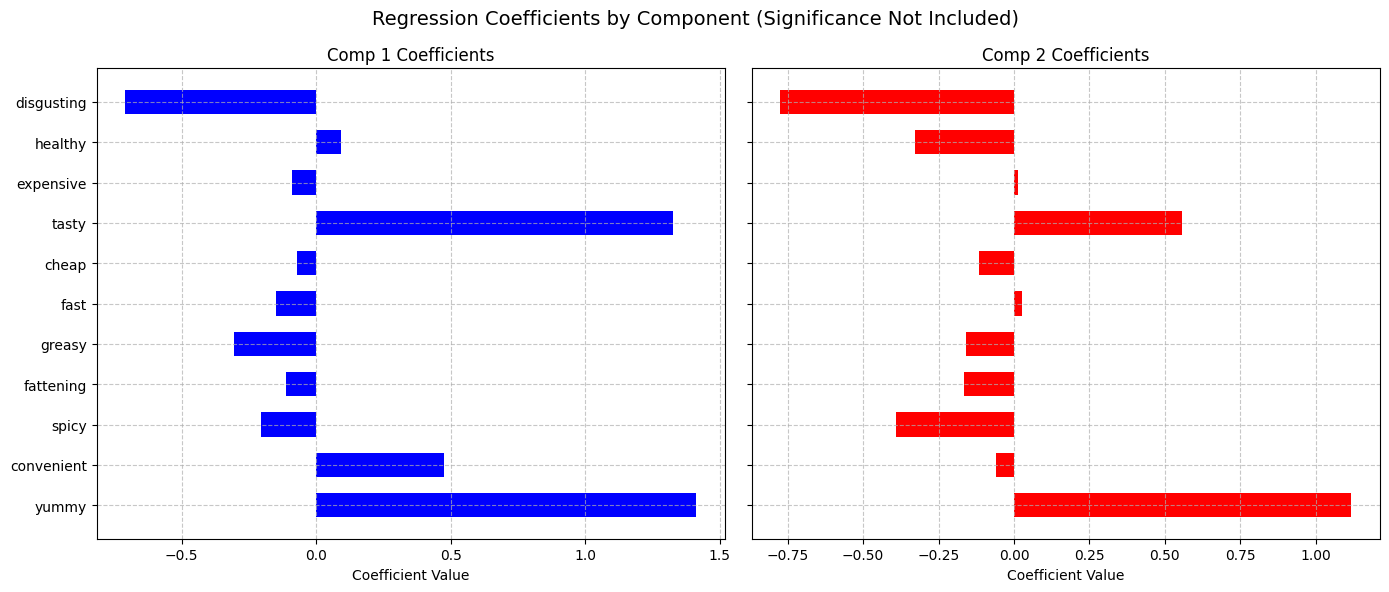

In [50]:
# Step 7: Plot (mimicking plot(MD.ref2, significance=TRUE))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
colors = ['blue', 'red']
# Plot for Comp 1
coefficients_comp1 = refit_models[0].coef_
ax1.barh(np.arange(len(coefficients_comp1)), coefficients_comp1, color=colors[0], height=0.6)
ax1.set_xlabel('Coefficient Value')
ax1.set_title('Comp 1 Coefficients')
ax1.set_yticks(np.arange(len(mcdonalds.columns[:11])))
ax1.set_yticklabels(mcdonalds.columns[:11], rotation=0)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot for Comp 2
coefficients_comp2 = refit_models[1].coef_
ax2.barh(np.arange(len(coefficients_comp2)), coefficients_comp2, color=colors[1], height=0.6)
ax2.set_xlabel('Coefficient Value')
ax2.set_title('Comp 2 Coefficients')
ax2.set_yticks(np.arange(len(mcdonalds.columns[:11])))
ax2.set_yticklabels(mcdonalds.columns[:11], rotation=0)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Regression Coefficients by Component (Significance Not Included)', fontsize=14)
plt.tight_layout()
plt.show()

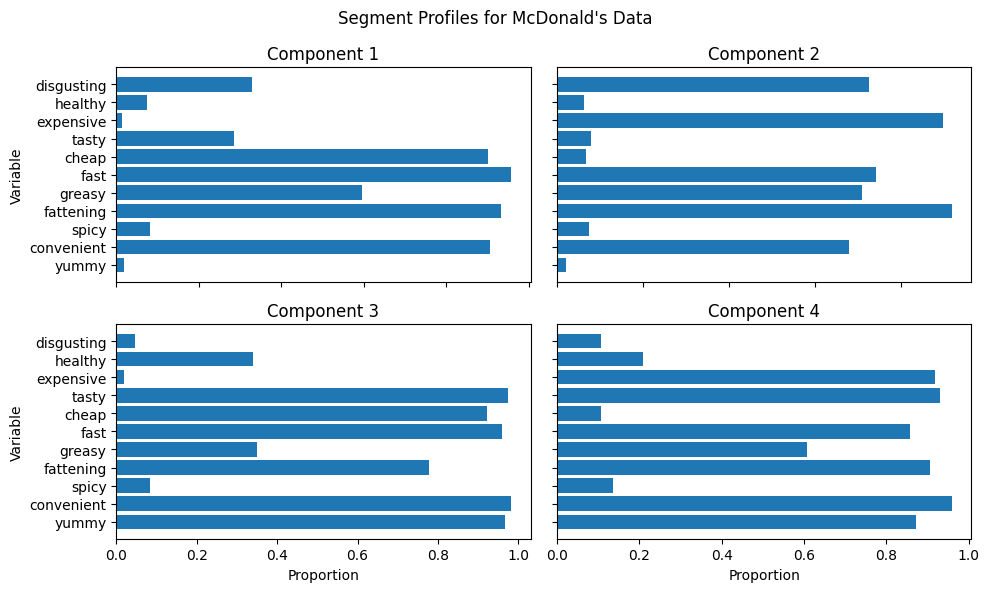

In [51]:
# Convert MD_x to DataFrame for grouping (using original column names)
MD = pd.DataFrame(MD_x, columns=mcdonalds.columns[:11])

# Create K-means model with 4 clusters
MD_km28 = {'4': KMeans(n_clusters=4, n_init=10, random_state=1234).fit(MD_x)}

# Extract labels and compute mean profiles
kmeans = MD_km28['4']
labels = kmeans.labels_
MD_mean = MD.groupby(labels).mean()

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

# Customize axes
for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

# Add super title and adjust layout
fig.suptitle('Segment Profiles for McDonald\'s Data')
fig.tight_layout()
plt.show()

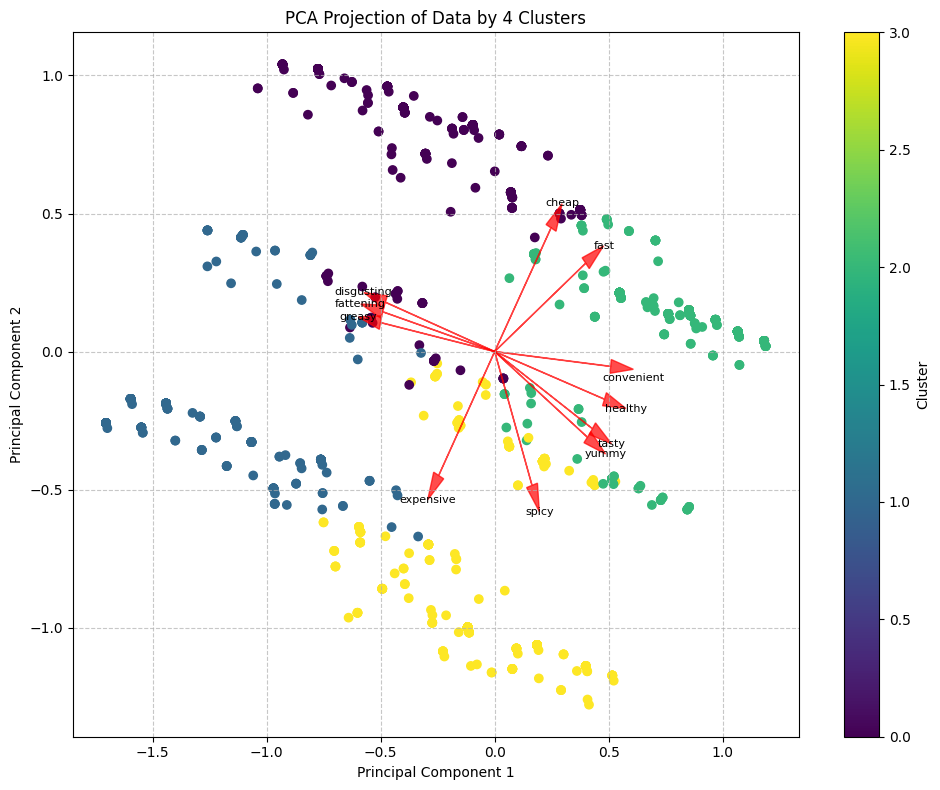

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_4, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Data by 4 Clusters')
plt.colorbar(scatter, label='Cluster')
# Add PCA axes with all variable names (mimicking projAxes(MD.pca))
components = pca.components_.T
scale = np.max(np.abs(X_pca)) * 0.3  # Adjust scale to fit labels
for i, component in enumerate(components):
    # Normalize the component vector for direction
    norm = np.sqrt(component[0]**2 + component[1]**2)
    if norm > 0:
        unit_x = component[0] / norm * scale
        unit_y = component[1] / norm * scale
        # Draw arrow
        plt.arrow(0, 0, unit_x, unit_y, color='r', head_width=0.05, head_length=0.1, alpha=0.7)
        # Place text label with offset based on direction
        text_x = unit_x * 1.2
        text_y = unit_y * 1.2
        # Adjust position to avoid overlap (simple heuristic)
        if abs(text_x) < 0.1: text_x *= 1.5  # Stretch if too close to center
        if abs(text_y) < 0.1: text_y *= 1.5
        plt.text(text_x, text_y, variable_names[i], color='black', fontsize=8, ha='center', va='center')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

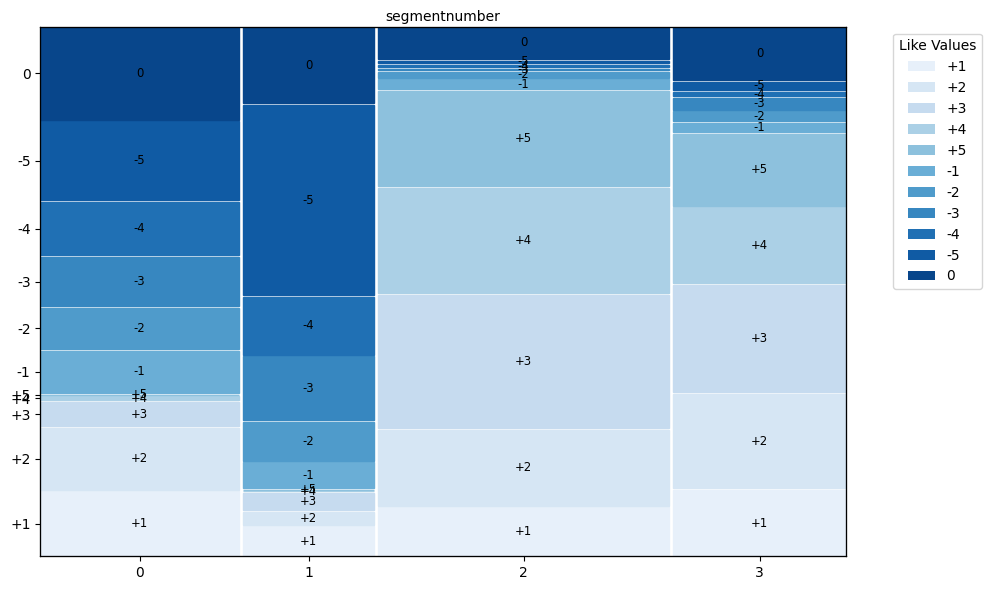

In [78]:
import statsmodels.graphics.mosaicplot as mosaic

plt.figure(figsize=(10, 6))
like_crosstab = pd.crosstab(k4, mcdonalds['Like'].apply(clean_like_label))  # Use cleaned labels
# Create a mapping from Like values to indices
like_values = like_crosstab.columns.tolist()
like_to_index = {val: idx for idx, val in enumerate(like_values)}
# Custom properties for better colors
properties = lambda key: {'color': sns.color_palette("Blues", len(like_crosstab.columns))[like_to_index[key[1]]]}
mosaic.mosaic(like_crosstab.stack(), ax=plt.gca(), title='', labelizer=lambda k: str(k[1]), properties=properties)
plt.xlabel('segmentnumber')
plt.ylabel('Like')
plt.title('')  # main="" equivalent
# Add a manual legend for reference
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=sns.color_palette("Blues", len(like_crosstab.columns))[i], label=val) 
                   for i, val in enumerate(like_values)]
plt.legend(handles=legend_elements, title='Like Values', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

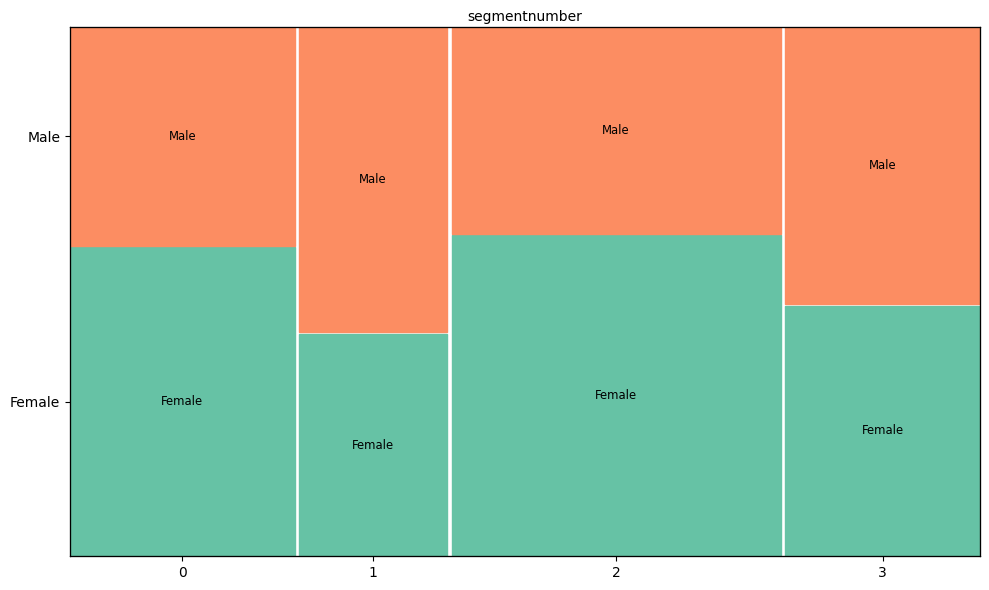

In [79]:
plt.figure(figsize=(10, 6))
gender_crosstab = pd.crosstab(k4, mcdonalds['Gender'])
# Custom properties for better colors
gender_values = gender_crosstab.columns.tolist()
gender_to_index = {val: idx for idx, val in enumerate(gender_values)}
properties = lambda key: {'color': sns.color_palette("Set2", len(gender_crosstab.columns))[gender_to_index[key[1]]]}
mosaic.mosaic(gender_crosstab.stack(), ax=plt.gca(), title='', labelizer=lambda k: str(k[1]), properties=properties)
plt.xlabel('segmentnumber')
plt.ylabel('Gender')
plt.title('')  # No main title
# Removed legend to avoid blocking the plot
plt.tight_layout()
plt.show()

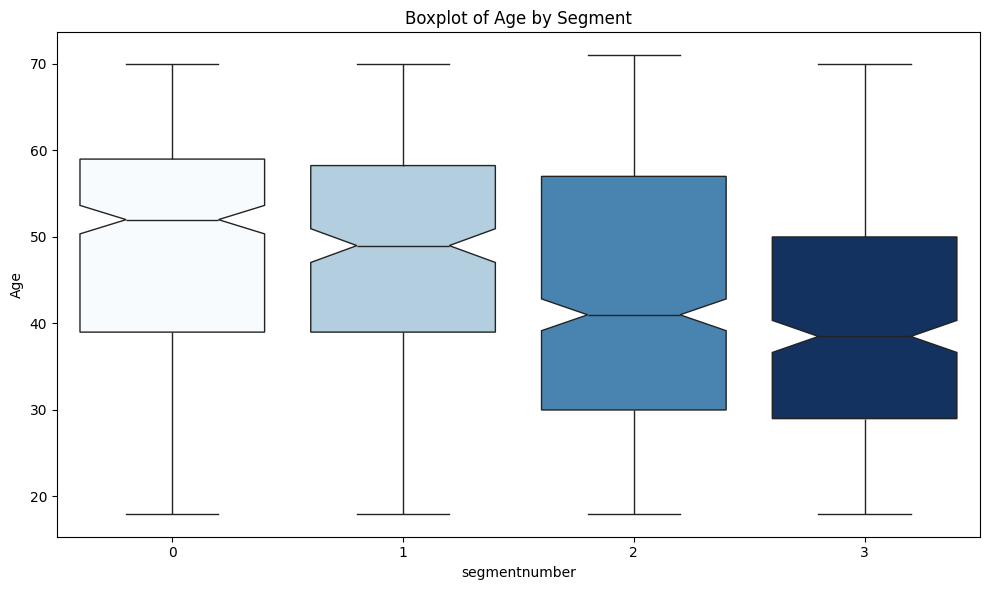

In [80]:
# Boxplot for Age (mimicking boxplot(mcdonalds$Age ~ k4, varwidth=TRUE, notch=TRUE))
plt.figure(figsize=(10, 6))
sns.boxplot(x=k4, y=mcdonalds['Age'], notch=True, hue=k4, palette="Blues", legend=False)
plt.xlabel('segmentnumber')
plt.ylabel('Age')
plt.title('Boxplot of Age by Segment')
plt.tight_layout()
plt.savefig('boxplot_age.png', dpi=300, bbox_inches='tight')
plt.show()

In [88]:
from sklearn.preprocessing import LabelEncoder

# Fit K-means with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(X)
mcdonalds['cluster_num'] = kmeans.labels_

# Encode VisitFrequency
le = LabelEncoder()
mcdonalds['VisitFrequency'] = le.fit_transform(mcdonalds['VisitFrequency'])

# Group by cluster and calculate mean VisitFrequency
visit = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.730769
1,1,2.691667
2,2,2.602251
3,3,2.550633


In [90]:
le = LabelEncoder()
mcdonalds['Like'] = le.fit_transform(mcdonalds['Like'])

Like = mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.109890
1,1,6.741667
2,2,3.868668
3,3,3.787975


In [91]:
le = LabelEncoder()
mcdonalds['Gender'] = le.fit_transform(mcdonalds['Gender'])

Gender = mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.414835
1,1,0.579167
2,2,0.392120
3,3,0.525316


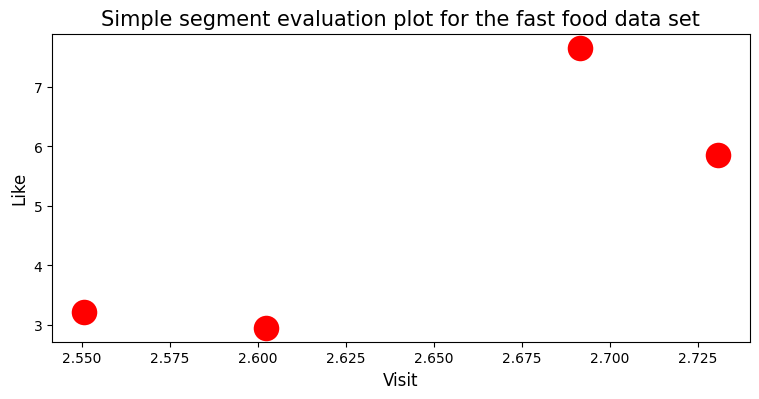

In [95]:
# Create scatter plot
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.savefig('segment_evaluation_plot.png', dpi=300, bbox_inches='tight')
plt.show()